In [1]:
import pandas as pd 

df = pd.read_csv('../../../data/Module3/IMDB-Dataset.csv')

df = df.drop_duplicates()

In [3]:
import re
import string 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

def expand_contractions(text):
    return contractions.fix(text)

def preprocess_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, 'html.parser') #removing html tags
    text = soup.get_text()
    text = expand_contractions(text) #expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs  
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text) #removing emojis
    text = re.sub(r'\.(?=\S)', '. ', text) #removing full stops, and adding space after full stops
    text = re.sub(r'http\S+', '', text) #removing urls
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ]) #removing punctuations
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()
    ]) #lemmatizing 
    return text

df['review'] = df['review'].apply(preprocess_text)






[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lapquang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lapquang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipykernel_124491/1356158331.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser') #removing html tags


In [5]:
print(df['review'][1])

wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done


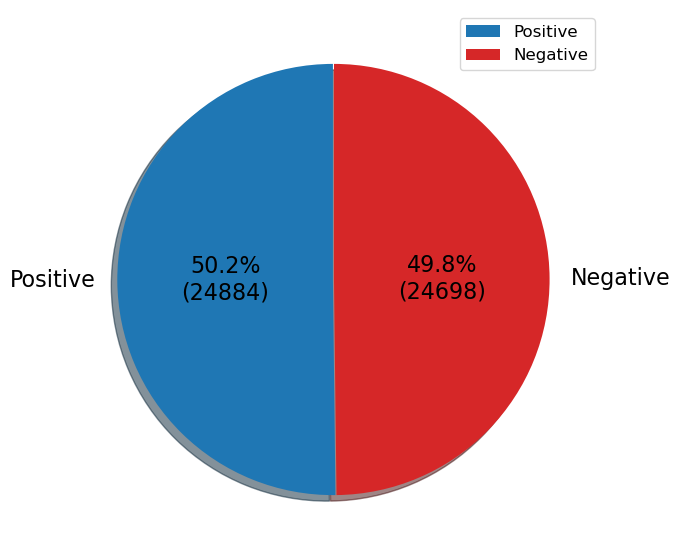

In [12]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = [r'Positive', r'Negative']

pie, ax = plt.subplots(figsize=[11,7])
plt.pie(data, autopct=lambda pct: func(pct, data),
        explode = [0.0025]*2, pctdistance=0.5, labels=labels, colors=[sns.color_palette()[0],'tab:red'],
          startangle=90, shadow=True, textprops={'fontsize': 16})

plt.legend(labels, loc = "best", prop={'size': 12})
pie.savefig("./IMDB-Dataset.png")
plt.show()

In [ ]:
#plot the length for each sample in each sentiment
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len 

hist_positve = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'positive'],
    x = "words length", hue="sentiment", kde = True, height = 7, aspect = 1.1,
    legend = False
).set(title = 'Words in positive reviews')
plt.show(hist_positve)

hist_negatve = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'negative'],
    x = "words length", hue="sentiment", kde = True, height = 7, aspect = 1.1,
    legend = False, palette=['tab:red']
).set(title = 'Words in negative reviews')

plt.show(hist_negatve)

